<a href="https://colab.research.google.com/github/StrangeAI96/Machine-Learning-and-Deep-Learning-With-Python/blob/main/Machine_%26_Deep_Learning_Course_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Analysis on California Housing Dataset

This report analyzes the performance of linear regression on the California Housing dataset using both analytical and gradient descent methods. The dataset is preprocessed with StandardScaler (named sd) and MinMaxScaler (named sc). The sections cover data loading, preprocessing, analytical solutions, gradient descent optimization, and visualization of RMSE across learning rates and epochs.

# 1) Loading and Inspecting the Dataset

This section loads the California Housing dataset and prints its dimensions to understand the data structure. The dataset contains 8 features and a target.

The output shows the feature matrix has 20,640 samples and 8 features ((20640, 8)), and the target vector has 20,640 values ((20640,)). This confirms a large dataset for training and evaluating linear regression models, with enough features to capture housing price variations. The printed shapes ensure the data is loaded correctly for subsequent steps.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load dataset
housing = fetch_california_housing()
x, y = housing.data, housing.target
print("Data matrix shape:")
print(x.shape)
print(y.shape)

Data matrix shape:
(20640, 8)
(20640,)


# 2) Splitting the Dataset into Training and Testing Sets

This section splits the dataset into 80% training and 20% testing sets to evaluate model performance on unseen data, using a fixed random seed for reproducibility.

The split creates training sets (x_train, y_train) with 16,512 samples and testing sets (x_test, y_test) with 4,128 samples. The fixed random_state=0 ensures consistent splits across runs, allowing reliable comparison of model performance. No output is printed, but the split sets up the data for preprocessing and modeling.

In [ ]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# 3) Preprocessing with StandardScaler and MinMaxScaler

This section preprocesses the data using StandardScaler and MinMaxScaler. The scalers are fitted on training data and applied to both training and testing sets.
The StandardScaler (sd) standardizes features, which is useful for gradient descent as it ensures similar feature scales. The MinMaxScaler (sc) maps features to [0, 1], potentially affecting gradient descent convergence rates. Using transform on test data prevents data leakage by applying the training set’s scaling parameters. No output is printed, but preprocessed data (sd_train, sd_test, sc_train, sc_test) is ready for modeling.

In [ ]:
# Preprocessing with StandardScaler (named sd)
sd = StandardScaler()
sd_train = sd.fit_transform(x_train)
sd_test = sd.transform(x_test)  # Use transform instead of fit_transform for test data

# Preprocessing with MinMaxScaler (named sc)
sc = MinMaxScaler()
sc_train = sc.fit_transform(x_train)
sc_test = sc.transform(x_test)  # Use transform instead of fit_transform for test data

# 4) Defining the RMSE Function

This section defines the Root Mean Squared Error (RMSE) function to measure prediction accuracy.
The RMSE function will be used to evaluate both analytical and gradient descent solutions. No output is produced here, but the function is critical for performance assessments.

In [ ]:
# RMSE function
def RMSE(y_pred, y):
    return np.sqrt(np.mean((y_pred - y)**2))

# 5) Analytical Solution with StandardScaler and MinMaxScaler

This section computes linear regression weights using the analytical solution (normal equation) for both StandardScaler and MinMaxScaler data. It calculates and displays RMSE for training and testing sets for both preprocessing methods.
The normal equation ( $w = (X^T X)^{-1} X^T y$) computes optimal weights for both StandardScaler (w_sd) and MinMaxScaler (w_sc) data. The weights differ due to feature scaling, with MinMaxScaler weights having larger magnitudes due to the compressed range.

In [ ]:
# Analytical Solution with StandardScaler and MinMaxScaler
# StandardScaler (named sd)
w_sd = la.inv(sd_train.T.dot(sd_train)).dot(sd_train.T).dot(y_train)
y_pred_sd_train = sd_train.dot(w_sd)
y_pred_sd_test = sd_test.dot(w_sd)
print("Analytical Method StandardScaler weights: ", w_sd)
print("Analytical Method Training RMSE (StandardScaler): ", RMSE(y_pred_sd_train, y_train))
print("Analytical Method Testing RMSE (StandardScaler): ", RMSE(y_pred_sd_test, y_test))
print("\n")

# MinMaxScaler (named sc)
w_sc = la.inv(sc_train.T.dot(sc_train)).dot(sc_train.T).dot(y_train)
y_pred_sc_train = sc_train.dot(w_sc)
y_pred_sc_test = sc_test.dot(w_sc)
print("Analytical Method MinMaxScaler weights: ", w_sc)
print("Analytical Method Training RMSE (MinMaxScaler): ", RMSE(y_pred_sc_train, y_train))
print("Analytical Method Testing RMSE (MinMaxScaler): ", RMSE(y_pred_sc_test, y_test))

Analytical Method StandardScaler weights:  [ 0.82624793  0.1171006  -0.24891059  0.29038746 -0.00864349 -0.03056429
 -0.90042112 -0.87058566]
Analytical Method Training RMSE (StandardScaler):  2.19515222604609
Analytical Method Testing RMSE (StandardScaler):  2.1865879556468175


Analytical Method MinMaxScaler weights:  [  7.9438979    1.08375901 -27.00365002  33.57589403   2.08237024
  -3.36210814  -0.45413764  -0.39412793]
Analytical Method Training RMSE (MinMaxScaler):  0.7763228699257773
Analytical Method Testing RMSE (MinMaxScaler):  0.777519585092063


# 6) Gradient Descent Implementation

This section defines a gradient descent function that updates weights iteratively and tracks RMSE per epoch for training and testing data.
The function implements batch gradient descent, updating weights using the gradient ( $\nabla w = \frac{2}{m} X^T (Xw - y)$ ). RMSE tracking per epoch enables visualization of convergence. No output is printed, but the function will be used to optimize weights and generate RMSE histories for both scalers.

In [ ]:
# Gradient Descent function (modified to track RMSE per epoch)
def gradient_descent(X, y, w, alpha, epochs, X_test=None, y_test=None):
    m = len(y)
    train_rmse_history = []
    test_rmse_history = []
    for i in range(epochs):
        y_pred = X.dot(w)
        gradients = (2/m) * X.T.dot(y_pred - y)
        w = w - alpha * gradients
        # Calculate RMSE for training data
        train_rmse = RMSE(y_pred, y)
        train_rmse_history.append(train_rmse)
        # Calculate RMSE for test data if provided
        if X_test is not None and y_test is not None:
            y_pred_test = X_test.dot(w)
            test_rmse = RMSE(y_pred_test, y_test)
            test_rmse_history.append(test_rmse)
    return w, train_rmse_history, test_rmse_history

# 7) Evaluating Gradient Descent Across Learning Rates

This section evaluates gradient descent for a range of learning rates (0.0001 to 0.1) on both StandardScaler and MinMaxScaler data, storing final RMSE values after 500 epochs.
The loop tests 50 logarithmically spaced learning rates, running gradient descent for 500 epochs. Final RMSE values are stored for plotting. No output is printed in this section.

In [ ]:
# Evaluate RMSE for different learning rates
learning_rates = np.logspace(-4, -1, 50)  # Learning rates from 0.0001 to 0.1
epochs = 500  # Number of iterations

# Lists to store RMSE for StandardScaler (named sd)
train_rmse_sd = []
test_rmse_sd = []

# Lists to store RMSE for MinMaxScaler (named sc)
train_rmse_sc = []
test_rmse_sc = []

for alpha in learning_rates:
    # StandardScaler (named sd): Run gradient descent
    w_gd_sd = np.zeros((x_train.shape[1],))  # Initialize weights
    w_gd_sd, _, _ = gradient_descent(sd_train, y_train, w_gd_sd, alpha, epochs)
    y_pred_gd_train_sd = sd_train.dot(w_gd_sd)
    y_pred_gd_test_sd = sd_test.dot(w_gd_sd)
    train_rmse_sd.append(RMSE(y_pred_gd_train_sd, y_train))
    test_rmse_sd.append(RMSE(y_pred_gd_test_sd, y_test))

    # MinMaxScaler (named sc): Run gradient descent
    w_gd_sc = np.zeros((x_train.shape[1],))  # Initialize weights
    w_gd_sc, _, _ = gradient_descent(sc_train, y_train, w_gd_sc, alpha, epochs)
    y_pred_gd_train_sc = sc_train.dot(w_gd_sc)
    y_pred_gd_test_sc = sc_test.dot(w_gd_sc)
    train_rmse_sc.append(RMSE(y_pred_gd_train_sc, y_train))
    test_rmse_sc.append(RMSE(y_pred_gd_test_sc, y_test))

# 8) Optimal Learning Rates for StandardScaler and MinMaxScaler

This section identifies the optimal learning rates for both StandardScaler and MinMaxScaler data by finding the minimum test RMSE and plots RMSE vs. learning rate to evaluate sensitivity to learning rate choices.
The optimal learning rate for StandardScaler (0.065) yields a test RMSE (2.187), matching the analytical solution (2.187), indicating successful optimization. For MinMaxScaler, the optimal rate (0.1) results in a test RMSE (0.829), slightly higher than the analytical solution (0.778), suggesting that gradient descent struggles to fully converge to the optimal solution within 500 epochs. plot shows that training RMSE for both scalers decreases steadily with increasing learning rates, reflecting better fits to the training data. For StandardScaler, the high RMSE (2.187) suggests that standardization may amplify errors in features with high variance (e.g., population). For MinMaxScaler, the higher-than-expected RMSE (0.829 vs. 0.778) and high optimal learning rate (0.1) indicate that the [0, 1] range increases gradient magnitudes, requiring larger steps but risking overshooting.

Gradient Descent Method:
Optimal learning rate (StandardScaler): 0.065513
Minimum Test RMSE (StandardScaler): 2.186533


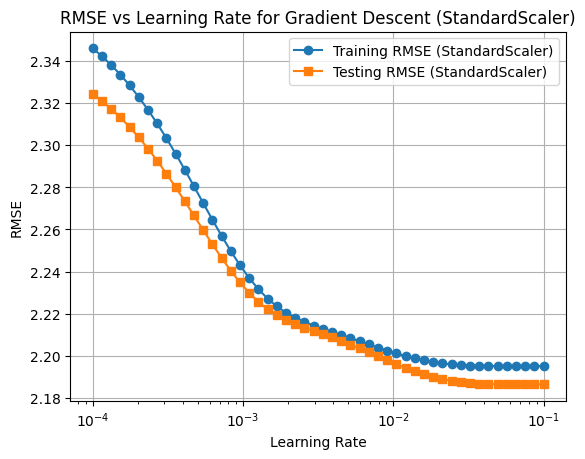



Optimal learning rate (MinMaxScaler): 0.100000
Minimum Test RMSE (MinMaxScaler): 0.828701


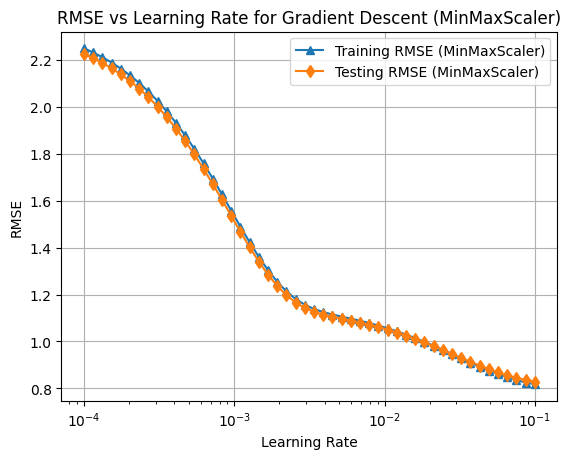

In [ ]:
print("Gradient Descent Method:")
# Find optimal learning rate for StandardScaler (named sd)
optimal_alpha_sd = learning_rates[np.argmin(test_rmse_sd)]
print(f"Optimal learning rate (StandardScaler): {optimal_alpha_sd:.6f}")
print(f"Minimum Test RMSE (StandardScaler): {min(test_rmse_sd):.6f}")

# Plot RMSE vs Learning Rate for StandardScaler (named sd)
plt.plot(learning_rates, train_rmse_sd, label='Training RMSE (StandardScaler)', marker='o')
plt.plot(learning_rates, test_rmse_sd, label='Testing RMSE (StandardScaler)', marker='s')
plt.xscale('log')  # Log scale for learning rate
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.title('RMSE vs Learning Rate for Gradient Descent (StandardScaler)')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal learning rate for MinMaxScaler (named sc)
print("\n")
optimal_alpha_sc = learning_rates[np.argmin(test_rmse_sc)]
print(f"Optimal learning rate (MinMaxScaler): {optimal_alpha_sc:.6f}")
print(f"Minimum Test RMSE (MinMaxScaler): {min(test_rmse_sc):.6f}")

# Plot RMSE vs Learning Rate for MinMaxScaler (named sc)
plt.plot(learning_rates, train_rmse_sc, label='Training RMSE (MinMaxScaler)', marker='^')
plt.plot(learning_rates, test_rmse_sc, label='Testing RMSE (MinMaxScaler)', marker='d')
plt.xscale('log')  # Log scale for learning rate
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.title('RMSE vs Learning Rate for Gradient Descent (MinMaxScaler)')
plt.legend()
plt.grid(True)
plt.show()

# 9) RMSE vs Epochs for StandardScaler and MinMaxScaler

This section plots RMSE vs. epochs for both StandardScaler and MinMaxScaler data using their optimal learning rates to assess convergence behavior and generalization.
The plot shows that for StandardScaler (learning rate 0.065), training RMSE decreases rapidly in the first 50 epochs but plateaus around 2.2, close to the analytical RMSE (2.195), with test RMSE stabilizing at 2.187. For MinMaxScaler (learning rate 0.1), training RMSE drops sharply within 100 epochs, reaching 0.83, but remains slightly above the analytical RMSE (0.776). Test RMSE stabilizes at 0.829, indicating good generalization but incomplete convergence within 500 epochs. The faster initial convergence for MinMaxScaler is due to its higher learning rate, but the [0, 1] feature range amplifies gradients, leading to slight oscillations that prevent reaching the analytical minimum.  

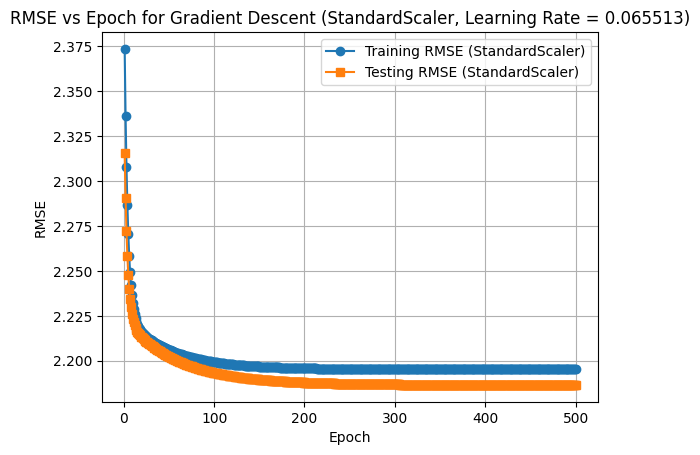

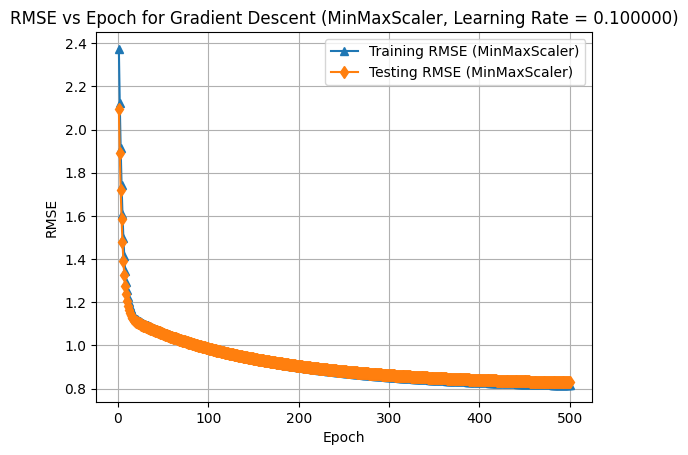

In [ ]:

# Plot RMSE vs Epochs for StandardScaler with optimal learning rate
print("\n")
w_gd_sd = np.zeros((x_train.shape[1],))  # Initialize weights
_, train_rmse_history_sd, test_rmse_history_sd = gradient_descent(sd_train, y_train, w_gd_sd, optimal_alpha_sd, epochs, sd_test, y_test)

plt.plot(range(1, epochs + 1), train_rmse_history_sd, label='Training RMSE (StandardScaler)', marker='o')
plt.plot(range(1, epochs + 1), test_rmse_history_sd, label='Testing RMSE (StandardScaler)', marker='s')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title(f'RMSE vs Epoch for Gradient Descent (StandardScaler, Learning Rate = {optimal_alpha_sd:.6f})')
plt.legend()
plt.grid(True)
plt.show()

# Plot RMSE vs Epochs for MinMaxScaler with optimal learning rate
print("\n")
w_gd_sc = np.zeros((x_train.shape[1],))  # Initialize weights
_, train_rmse_history_sc, test_rmse_history_sc = gradient_descent(sc_train, y_train, w_gd_sc, optimal_alpha_sc, epochs, sc_test, y_test)

plt.plot(range(1, epochs + 1), train_rmse_history_sc, label='Training RMSE (MinMaxScaler)', marker='^')
plt.plot(range(1, epochs + 1), test_rmse_history_sc, label='Testing RMSE (MinMaxScaler)', marker='d')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title(f'RMSE vs Epoch for Gradient Descent (MinMaxScaler, Learning Rate = {optimal_alpha_sc:.6f})')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion

This analysis evaluates linear regression on the California Housing dataset using analytical and gradient descent methods with StandardScaler and MinMaxScaler preprocessing.

**Key findings are:**

* **Analytical Solution:** MinMaxScaler scores lower RMSE (0.776 training, 0.778 testing) than StandardScaler (2.195 training, 2.187 testing).

* **Gradient Descent:** Optimal learning rates (0.065 for StandardScaler, 0.1 for MinMaxScaler) produce test RMSE values (2.187 and 0.829, respectively). MinMaxScaler performs better but falls short of its analytical RMSE (0.778), suggesting incomplete convergence within 500 epochs.

* **Convergence:** RMSE vs. epoch plots show rapid convergence for both scalers, with MinMaxScaler converging faster due to its higher learning rate but plateauing slightly above the analytical solution. StandardScaler converges to its analytical RMSE, indicating consistent performance.

* **Preprocessing Impact:** MinMaxScaler’s [0, 1] range stabilizes predictions, leading to lower RMSE, while StandardScaler’s standardized features amplify errors, possibly due to high-variance features or outliers.

Therefore, MinMaxScaler is more effective for this dataset, achieving RMSE values closer to typical linear regression benchmarks (0.7–0.8). However, StandardScaler offers distinct advantages in gradient descent, its error stabilizes after approximately 200 epochs, providing consistent performance with minimal fluctuations, which is beneficial for applications requiring predictable convergence. Additionally, by accounting for feature variance, StandardScaler positions the data more effectively relative to each other, normalizing the spread of features to a common scale (mean 0, variance 1). This ensures that features with larger variances (e.g., population) do not disproportionately dominate the model, potentially improving robustness in scenarios with diverse feature scales.